In [1]:
import requests
import json
import os
from datetime import datetime, timebzdelta
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
api_key = os.environ['BINANCE_API_KEY']
api_secret = os.environ['BINANCE_API_SECRET']

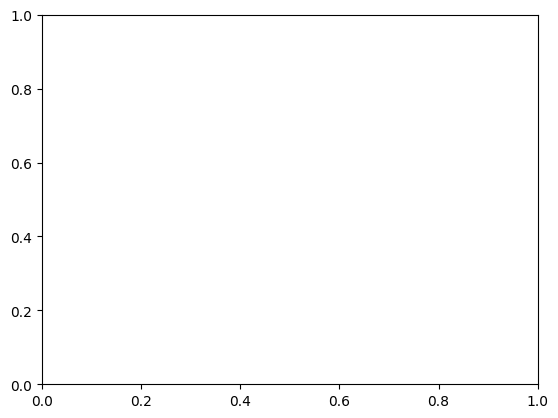

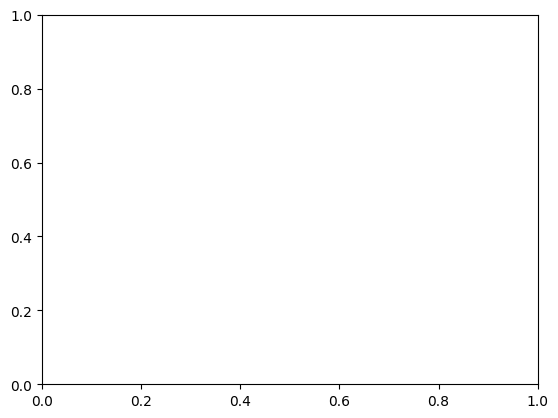

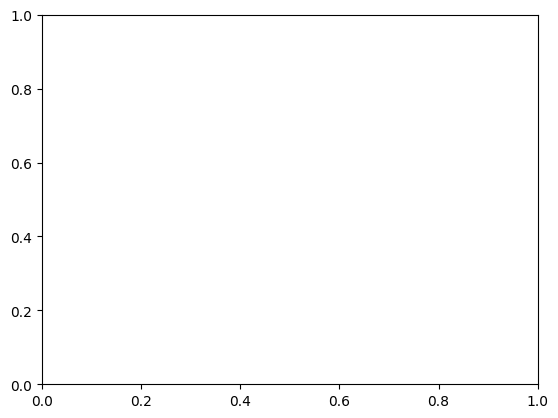

In [6]:
# Set the base URL for Binance API
base_url = "https://api.binance.com/api/v3"

# Set the list of exchange pairs you want to query
exchange_pairs = ["BTCUSDT", "ETHUSDT", "LTCUSDT"]

# Set the interval and limit for Klines (candlestick data)
interval = "15m"
limit = 960  # 960 is roughly equivalent to 24 hours worth of 15-minute candles

# Create a directory to store the chart images if it doesn't exist
data_dir = f"data/{datetime.today().strftime('%Y-%m-%d')}"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

for pair in exchange_pairs:
    # Construct the API request URL and headers
    url = f"{base_url}/klines"
    headers = {
        "X-MBX-APIKEY": api_key,
        "X-MBX-SECRETKEY": api_secret,
        "Content-Type": "application/json"
    }
    params = {
        "symbol": pair,
        "interval": interval,
        "limit": limit
    }

    # Send the request and get the response
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        print(f"Error fetching data for {pair}: {response.text}")
        continue

    # Parse the JSON response into a list of Klines (candlestick data)
    klines_json = response.json()
    klines_data = []
    for kline in klines_json:
        kline_data = {
            "open_time": int(kline[0]),
            "open_price": float(kline[1]),
            "high_price": float(kline[2]),
            "low_price": float(kline[3]),
            "close_price": float(kline[4]),
            "volume": float(kline[5])
        }
        klines_data.append(kline_data)

    # Create a new figure and axis object using Matplotlib
    fig, ax1 = plt.subplots()

    # Plot the candlestick chart using Matplotlib's `plot_candlestick_ochl

In [9]:
klines_data

[{'open_time': 1728513000000,
  'open_price': 64.22,
  'high_price': 64.33,
  'low_price': 64.16,
  'close_price': 64.27,
  'volume': 1645.746},
 {'open_time': 1728513900000,
  'open_price': 64.29,
  'high_price': 64.43,
  'low_price': 64.27,
  'close_price': 64.43,
  'volume': 1069.755},
 {'open_time': 1728514800000,
  'open_price': 64.43,
  'high_price': 64.62,
  'low_price': 64.39,
  'close_price': 64.61,
  'volume': 1454.87},
 {'open_time': 1728515700000,
  'open_price': 64.59,
  'high_price': 64.68,
  'low_price': 64.53,
  'close_price': 64.54,
  'volume': 1371.109},
 {'open_time': 1728516600000,
  'open_price': 64.53,
  'high_price': 64.67,
  'low_price': 64.5,
  'close_price': 64.63,
  'volume': 1424.67},
 {'open_time': 1728517500000,
  'open_price': 64.62,
  'high_price': 64.71,
  'low_price': 64.57,
  'close_price': 64.59,
  'volume': 1206.153},
 {'open_time': 1728518400000,
  'open_price': 64.59,
  'high_price': 64.6,
  'low_price': 64.43,
  'close_price': 64.52,
  'volume': 